In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

from datetime import date, datetime
from scipy.stats import linregress
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
latitudes_longitudes = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
latitudes_range = (-90, 90)
longitudes_range = (-180, 180)

# Create a set of random latitudes and longitudes combinations
latitudes = np.random.uniform(latitudes_range[0], latitudes_range[1], size=1500)
longitudes = np.random.uniform(longitudes_range[0], longitudes_range[1], size=1500)

latitudes_longitudes = zip(latitudes, longitudes)

# Identify nearest city for each latitude, longitude combination
for latitude, longitude in latitudes_longitudes:
    city = citipy.nearest_city(latitude, longitude).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 602


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
base_url = "http://api.openweathermap.org/data/2.5/weather"

# Set up the parameters for the API call
params = {
    "appid": weather_api_key,
    "units": "metric"
}

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for index, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if index % 50 == 0 and index >= 50:
        set_count += 1
        record_count = 0

    # Log the url, record, and set numbers
    print(f"Processing Record '{record_count}' of Set '{set_count}' | '{city}'")

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Add the current city name to the query parameter
        params['q'] = city
        
        # Make the API request
        response = requests.get(base_url, params=params)
        
        # Parse the JSON and retrieve data
        weather_data = response.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_latitude = weather_data["coord"]["lat"]
        city_longitude = weather_data["coord"]["lon"]
        city_max_temp = weather_data["main"]["temp_max"]
        city_humidity = weather_data["main"]["humidity"]
        city_clouds = weather_data["clouds"]["all"]
        city_wind_speed = weather_data["wind"]["speed"]
        city_country = weather_data["sys"]["country"]
        city_date = weather_data["dt"]

        # Append the City information into city_data list
        city_data.append(
            {
                "City": city, 
                "Lat": city_latitude, 
                "Lng": city_longitude, 
                "Max Temp": city_max_temp,
                "Humidity": city_humidity,
                "Cloudiness": city_clouds,
                "Wind Speed": city_wind_speed,
                "Country": city_country,
                "Date": city_date
            }
        )

    # If an error is experienced, skip the city
    except Exception:
        print(f"City '{city}' not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record '1' of Set '1' | 'akureyri'
Processing Record '2' of Set '1' | 'nadi'
Processing Record '3' of Set '1' | 'west island'
Processing Record '4' of Set '1' | 'yellowknife'
Processing Record '5' of Set '1' | 'blackmans bay'
Processing Record '6' of Set '1' | 'college'
Processing Record '7' of Set '1' | 'thunder bay'
Processing Record '8' of Set '1' | 'hawaiian paradise park'
Processing Record '9' of Set '1' | 'bethel'
Processing Record '10' of Set '1' | 'papatowai'
Processing Record '11' of Set '1' | 'kingston'
Processing Record '12' of Set '1' | 'san antonio de pale'
Processing Record '13' of Set '1' | 'alta'
Processing Record '14' of Set '1' | 'polyarnyy'
Processing Record '15' of Set '1' | 'flinders view'
Processing Record '16' of Set '1' | 'bilibino'
Processing Record '17' of Set '1' | 'adamstown'
Processing Record '18' of Set '1' | 'ribeira grande'
Processing Record '19' of Set '1' | 'ust-nera'
Processing Rec

Processing Record '14' of Set '4' | 'lata'
Processing Record '15' of Set '4' | 'ruidoso'
Processing Record '16' of Set '4' | 'weno'
Processing Record '17' of Set '4' | 'punta arenas'
Processing Record '18' of Set '4' | 'mahdia'
Processing Record '19' of Set '4' | 'freetown'
Processing Record '20' of Set '4' | 'rurrenabaque'
Processing Record '21' of Set '4' | 'aroma'
Processing Record '22' of Set '4' | 'brejo santo'
Processing Record '23' of Set '4' | 'northam'
Processing Record '24' of Set '4' | 'puerto deseado'
Processing Record '25' of Set '4' | 'ushuaia'
Processing Record '26' of Set '4' | 'susuman'
Processing Record '27' of Set '4' | 'ambovombe'
Processing Record '28' of Set '4' | 'parras de la fuente'
Processing Record '29' of Set '4' | 'colonia'
Processing Record '30' of Set '4' | 'toga village'
City 'toga village' not found. Skipping...
Processing Record '31' of Set '4' | 'soto la marina'
Processing Record '32' of Set '4' | 'dalandzadgad'
Processing Record '33' of Set '4' | 'is

City 'hayma'' not found. Skipping...
Processing Record '27' of Set '7' | 'sake'
Processing Record '28' of Set '7' | 'iskateley'
Processing Record '29' of Set '7' | 'juneau'
Processing Record '30' of Set '7' | 'sinabang'
Processing Record '31' of Set '7' | 'rawson'
Processing Record '32' of Set '7' | 'kuanda'
Processing Record '33' of Set '7' | 'sao vicente'
Processing Record '34' of Set '7' | 'nago'
Processing Record '35' of Set '7' | 'alacranes'
Processing Record '36' of Set '7' | 'kailua-kona'
Processing Record '37' of Set '7' | 'wucheng'
Processing Record '38' of Set '7' | 'kingman'
Processing Record '39' of Set '7' | 'yangquan'
Processing Record '40' of Set '7' | 'north tamworth'
Processing Record '41' of Set '7' | 'ambon'
Processing Record '42' of Set '7' | 'ariquemes'
Processing Record '43' of Set '7' | 'santana'
Processing Record '44' of Set '7' | 'salinopolis'
Processing Record '45' of Set '7' | 'magadan'
Processing Record '46' of Set '7' | 'kralendijk'
Processing Record '47' o

Processing Record '46' of Set '10' | 'muroto-misakicho'
Processing Record '47' of Set '10' | 'juankoski'
Processing Record '48' of Set '10' | 'kargasok'
Processing Record '49' of Set '10' | 'souillac'
Processing Record '0' of Set '11' | 'aflou'
Processing Record '1' of Set '11' | 'nagato'
Processing Record '2' of Set '11' | 'sarangani'
Processing Record '3' of Set '11' | 'miches'
Processing Record '4' of Set '11' | 'manaure'
Processing Record '5' of Set '11' | 'mercedes'
Processing Record '6' of Set '11' | 'dauphin'
Processing Record '7' of Set '11' | 'shenjiamen'
Processing Record '8' of Set '11' | 'mejit'
Processing Record '9' of Set '11' | 'birzebbuga'
Processing Record '10' of Set '11' | 'los llanos de aridane'
Processing Record '11' of Set '11' | 'edmundston'
Processing Record '12' of Set '11' | 'lae'
Processing Record '13' of Set '11' | 'turkmenbasy'
Processing Record '14' of Set '11' | 'kapa'a'
Processing Record '15' of Set '11' | 'shadrinsk'
Processing Record '16' of Set '11' |

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          577
Lat           577
Lng           577
Max Temp      577
Humidity      577
Cloudiness    577
Wind Speed    577
Country       577
Date          577
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,akureyri,65.6835,-18.0878,9.96,53,75,6.17,IS,1685033817
1,nadi,-17.8000,177.4167,21.00,88,75,1.54,FJ,1685033817
2,west island,-12.1568,96.8225,25.99,89,40,6.17,CC,1685033818
3,yellowknife,62.4560,-114.3525,11.29,62,40,4.47,CA,1685033818
4,blackmans bay,-43.0167,147.3167,5.96,78,30,5.14,AU,1685033818


In [7]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,akureyri,65.6835,-18.0878,9.96,53,75,6.17,IS,1685033817
1,nadi,-17.8000,177.4167,21.00,88,75,1.54,FJ,1685033817
2,west island,-12.1568,96.8225,25.99,89,40,6.17,CC,1685033818
3,yellowknife,62.4560,-114.3525,11.29,62,40,4.47,CA,1685033818
4,blackmans bay,-43.0167,147.3167,5.96,78,30,5.14,AU,1685033818


In [8]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [9]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,akureyri,65.6835,-18.0878,9.96,53,75,6.17,IS,1685033817
1,nadi,-17.8000,177.4167,21.00,88,75,1.54,FJ,1685033817
2,west island,-12.1568,96.8225,25.99,89,40,6.17,CC,1685033818
3,yellowknife,62.4560,-114.3525,11.29,62,40,4.47,CA,1685033818
4,blackmans bay,-43.0167,147.3167,5.96,78,30,5.14,AU,1685033818


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

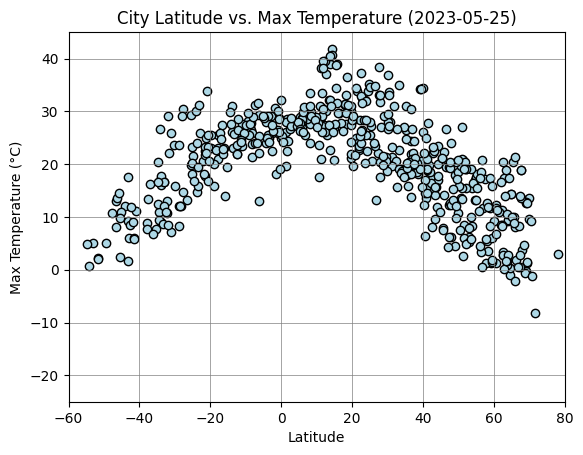

In [10]:
# Build scatter plot for latitude vs. temperature

# Extract latitude and max temperature columns from the DataFrame
latitude = city_data_df['Lat']
max_temp = city_data_df['Max Temp']

# Create a scatter plot
plt.scatter(latitude, max_temp, edgecolor='black', facecolor='lightblue', linewidth=1.0)

# Add latitude and longitude lines
plt.grid(True, linestyle='-', linewidth=0.5, color='gray')

# Get today's date
today = date.today()

# Set plot title and labels
plt.title(f'City Latitude vs. Max Temperature ({today.strftime("%Y-%m-%d")})')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (°C)')

# Set custom range for x-axis (latitude)
plt.xlim(-60, 80)

# Set custom range for y-axis (max temperature)
plt.ylim(-25, 45)

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

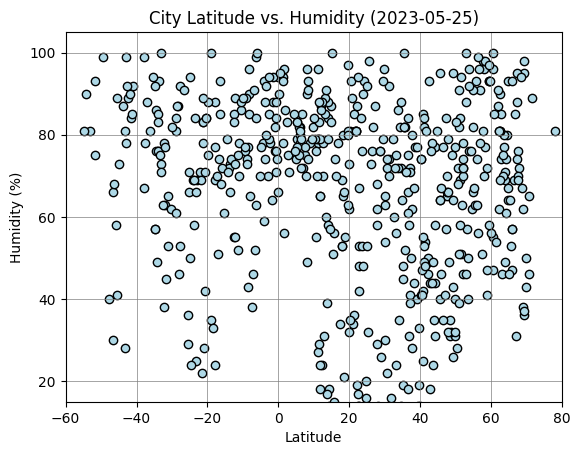

In [11]:
# Build the scatter plots for latitude vs. humidity

# Extract latitude and humidity columns from the DataFrame
latitude = city_data_df['Lat']
humidity = city_data_df['Humidity']

# Create a scatter plot
plt.scatter(latitude, humidity, edgecolor='black', facecolor='lightblue', linewidth=1.0)

# Add latitude and longitude lines
plt.grid(True, linestyle='-', linewidth=0.5, color='gray')

# Get today's date
today = date.today()

# Set plot title and labels
plt.title(f'City Latitude vs. Humidity ({today.strftime("%Y-%m-%d")})')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

# Set custom range for x-axis (latitude)
plt.xlim(-60, 80)

# Set custom range for y-axis (humidity) with a buffer space of 5 units
plt.ylim(15, 105)

# Set y-axis tick values with a step of 20
plt.yticks(range(20, 101, 20))

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

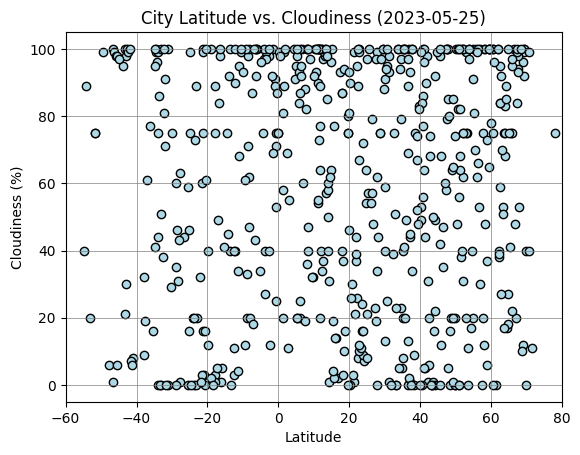

In [12]:
# Build the scatter plots for latitude vs. cloudiness

# Extract latitude and Cloudiness columns from the DataFrame
latitude = city_data_df['Lat']
cloudiness = city_data_df['Cloudiness']

# Create a scatter plot
plt.scatter(latitude, cloudiness, edgecolor='black', facecolor='lightblue', linewidth=1.0)

# Add latitude and longitude lines
plt.grid(True, linestyle='-', linewidth=0.5, color='gray')

# Get today's date
today = date.today()

# Set plot title and labels
plt.title(f'City Latitude vs. Cloudiness ({today.strftime("%Y-%m-%d")})')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

# Set custom range for x-axis (latitude)
plt.xlim(-60, 80)

# Set custom range for y-axis (cloudiness) with a buffer space of 5 units
plt.ylim(-5, 105)

# Set y-axis tick values with a step of 20
plt.yticks(range(0, 101, 20))

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

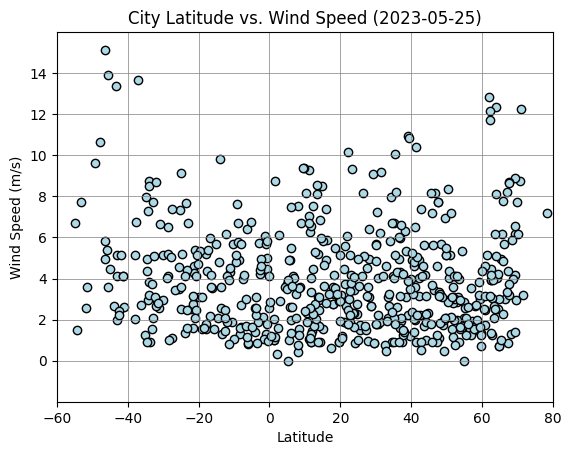

In [13]:
# Build the scatter plots for latitude vs. wind speed

# Extract latitude and Wind Speed columns from the DataFrame
latitude = city_data_df['Lat']
wind_speed = city_data_df['Wind Speed']

# Create a scatter plot
plt.scatter(latitude, wind_speed, edgecolor='black', facecolor='lightblue', linewidth=1.0)

# Add latitude and longitude lines
plt.grid(True, linestyle='-', linewidth=0.5, color='gray')

# Get today's date
today = date.today()

# Set plot title and labels
plt.title(f'City Latitude vs. Wind Speed ({today.strftime("%Y-%m-%d")})')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')

# Set custom range for x-axis (latitude)
plt.xlim(-60, 80)

# Set custom range for y-axis (Wind Speed) with a buffer space of 5 units
plt.ylim(-2, 16)

# Set y-axis tick values with a step of 2
y_ticks = np.arange(0, 16, 2)
plt.yticks(y_ticks)

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [18]:
# Define a function to create Linear Regression plots
def create_regression_plot(data, x_col, y_col, equation_pos='top left'):
    # Extract x and y values from the data
    x = data[x_col]
    y = data[y_col]

    # Create a scatter plot
    plt.scatter(x, y)

    # Fit linear regression model
    reg_model = LinearRegression()
    reg_model.fit(x.values.reshape(-1, 1), y)

    # Get the regression line
    x_range = pd.DataFrame({x_col: [x.min(), x.max()]})
    y_pred = reg_model.predict(x_range.values.reshape(-1, 1))

    # Add the regression line to the plot
    plt.plot(x_range, y_pred, color='red', linewidth=2)
    
    # Calculate correlation coefficient (r-value)
    r_value, _ = pearsonr(x, y)

    # Generate the equation string
    equation = f'y = {reg_model.coef_[0]:.2f}x + {reg_model.intercept_:.2f}'
    
    # Set the position of the equation text
    equation_x = x.min()
    equation_y = y.max()
    equation_y_offset = (y.max() - y.min()) * 0.15  # Adjust the offset value as needed

    if equation_pos == 'top right':
        equation_x = x.max()
        
    elif equation_pos == 'bottom left':
        equation_y = y.min() + equation_y_offset
        
    elif equation_pos == 'bottom right':
        equation_x = x.max()
        equation_y = y.min() + equation_y_offset
        
    elif equation_pos == 'top left':
        equation_y = y.max() - equation_y_offset

    # print the r-value
    print(f"The r-value is: {r_value}")
    
    # print the linear regression equation
    print(f"The equation is: {equation}")
    
    # Add equation to the plot
    plt.text(equation_x, equation_y, equation, fontsize=16, color='red', ha='left')

    # Set plot title and labels
    plt.title(f'{x_col} vs. {y_col} Linear Regression')
    plt.xlabel(x_col)
    plt.ylabel(y_col)

    # Show the plot
    plt.show()

In [15]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
filter = (city_data_df['Lat'] > 0)
northern_hemisphere_df = city_data_df[filter]

# Display sample data
northern_hemisphere_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,akureyri,65.6835,-18.0878,9.96,53,75,6.17,IS,1685033817
3,yellowknife,62.4560,-114.3525,11.29,62,40,4.47,CA,1685033818
5,college,64.8569,-147.8028,14.33,64,27,0.69,US,1685033819
6,thunder bay,48.4001,-89.3168,12.99,35,0,5.66,CA,1685033819
7,hawaiian paradise park,19.5933,-154.9731,21.13,97,80,3.12,US,1685033819


In [16]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
filter = (city_data_df['Lat'] < 0)
southern_hemisphere_df = city_data_df[filter]

# Display sample data
southern_hemisphere_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,nadi,-17.8000,177.4167,21.00,88,75,1.54,FJ,1685033817
2,west island,-12.1568,96.8225,25.99,89,40,6.17,CC,1685033818
4,blackmans bay,-43.0167,147.3167,5.96,78,30,5.14,AU,1685033818
9,papatowai,-46.5619,169.4708,13.08,66,100,4.97,NZ,1685033820
11,san antonio de pale,-1.4014,5.6325,26.49,88,100,6.05,GQ,1685033821


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.7915409869277372
The equation is: y = -0.39x + 34.40


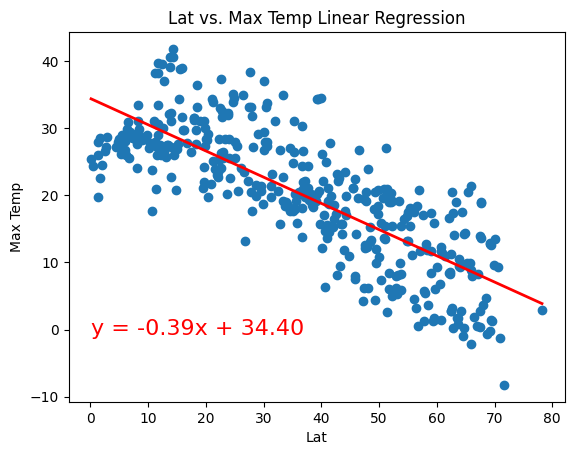

In [19]:
# Linear regression on Northern Hemisphere
create_regression_plot(northern_hemisphere_df, 'Lat', 'Max Temp', 'bottom left')

**Discussion about the linear relationship:** 

- The negative coefficient of the latitude (-0.37) indicates an inverse relationship between latitude and maximum temperature in the northern hemisphere.<br><br>
- As latitude increases (moving away from the equator towards the poles), the maximum temperature tends to decrease. This suggests that higher latitudes in the northern hemisphere experience lower temperatures.<br><br>
- The y-intercept (33.22) represents the estimated maximum temperature when latitude is zero. In this case, it suggests that at the equator (latitude zero), the maximum temperature is around 33.22 (°C).

The r-value is: 0.8400031459931532
The equation is: y = 0.41x + 28.98


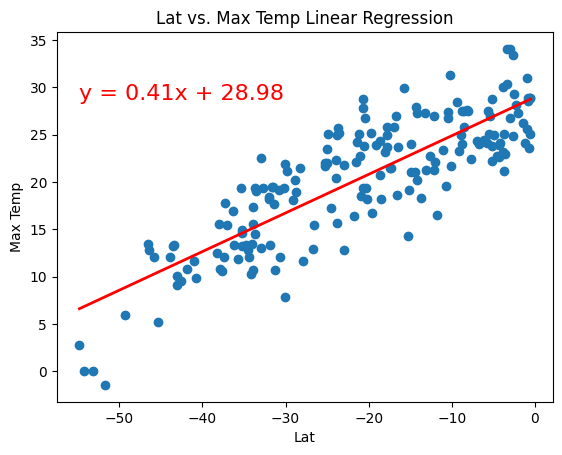

In [148]:
# Linear regression on Southern Hemisphere
create_regression_plot(southern_hemisphere_df, 'Lat', 'Max Temp', 'top left')

**Discussion about the linear relationship:** 

- The positive coefficient of the latitude (0.41) indicates a positive relationship between latitude and maximum temperature in the southern hemisphere.<br><br>
- As latitude increases (moving away from the equator towards the poles), the maximum temperature tends to increase. This suggests that higher latitudes in the southern hemisphere experience higher temperatures.<br><br>
- The y-intercept (28.98) represents the estimated maximum temperature when latitude is zero. In this case, it suggests that at the equator (latitude zero), the maximum temperature is around 28.98 (°C).

### Humidity vs. Latitude Linear Regression Plot

The r-value is: -0.032969861142783184
The equation is: y = -0.04x + 65.08


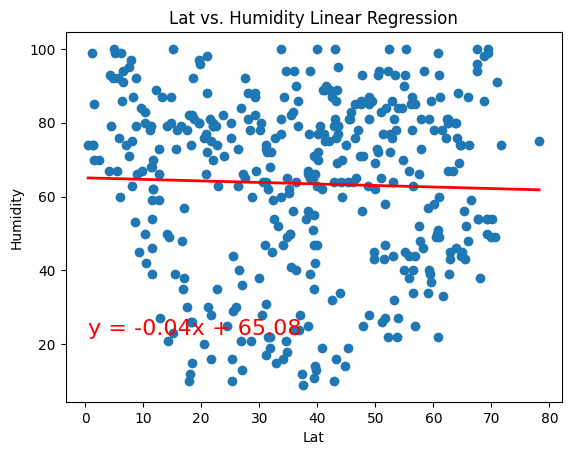

In [149]:
# Northern Hemisphere
create_regression_plot(northern_hemisphere_df, 'Lat', 'Humidity', 'bottom left')

**Discussion about the linear relationship:** 

- The negative coefficient of the latitude (-0.04) indicates a weak inverse relationship between latitude and humidity in the northern hemisphere.<br><br>
- As latitude increases (moving away from the equator towards the poles), the humidity tends to slightly decrease, although the effect is relatively small.<br><br>
- The y-intercept (65.08) represents the estimated humidity when latitude is zero. In this case, it suggests that at the equator (latitude zero), the humidity is around 65.08% .

The r-value is: 0.11569523466318686
The equation is: y = 0.16x + 76.94


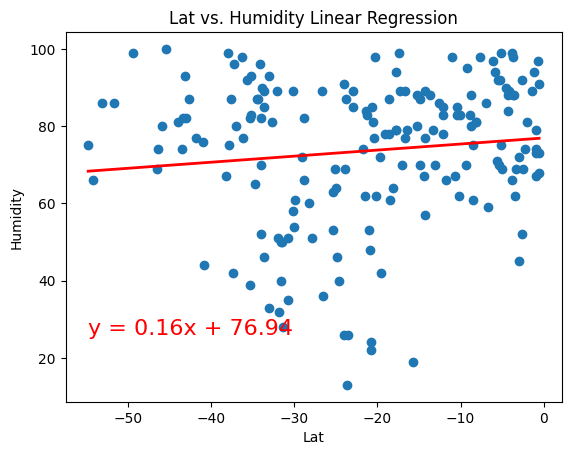

In [150]:
# Southern Hemisphere
create_regression_plot(southern_hemisphere_df, 'Lat', 'Humidity', 'bottom left')

**Discussion about the linear relationship:** 

- The positive coefficient of the latitude (0.16) indicates a weak positive relationship between latitude and humidity in the southern hemisphere.<br><br>
- As latitude increases (moving away from the equator towards the poles), the humidity tends to slightly increase, although the effect is relatively small.<br><br>
- The y-intercept (76.94) represents the estimated humidity when latitude is zero. In this case, it suggests that at the equator (latitude zero), the humidity is around 76.94%.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.024253561054758947
The equation is: y = 0.05x + 54.41


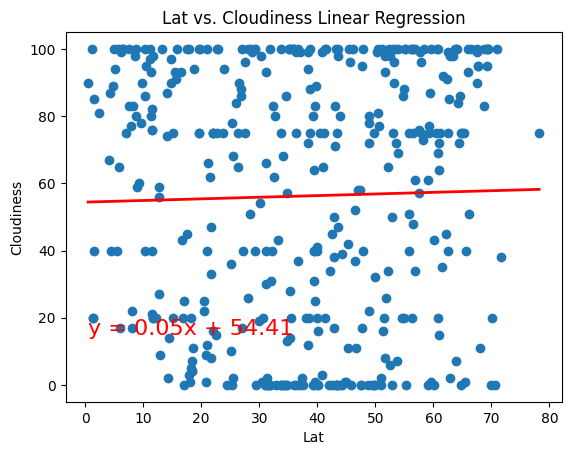

In [151]:
# Northern Hemisphere
create_regression_plot(northern_hemisphere_df, 'Lat', 'Cloudiness', 'bottom left')

**Discussion about the linear relationship:** 

- The positive coefficient of the latitude (0.05) suggests a weak positive relationship between latitude and cloudiness in the northern hemisphere.<br><br>
- As latitude increases (moving away from the equator towards the poles), there is a slight tendency for cloudiness to increase.<br><br>
- The y-intercept (54.41) represents the estimated cloudiness when latitude is zero. In this case, it suggests that at the equator (latitude zero), the cloudiness is around 54.41%.

The r-value is: -0.05958911834833841
The equation is: y = -0.16x + 50.65


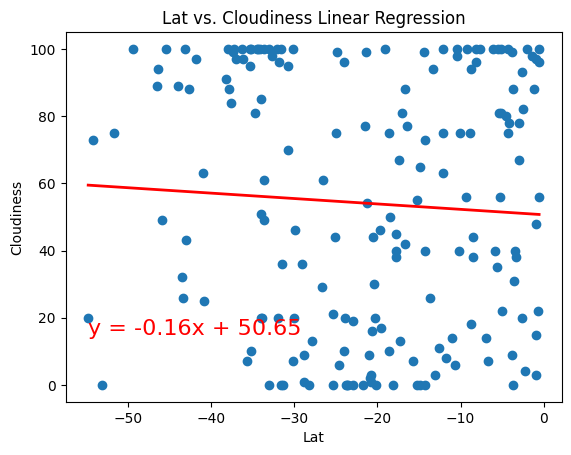

In [152]:
# Southern Hemisphere
create_regression_plot(southern_hemisphere_df, 'Lat', 'Cloudiness', 'bottom left')

**Discussion about the linear relationship:** 

- The negative coefficient of the latitude (-0.16) suggests a weak negative relationship between latitude and cloudiness in the southern hemisphere.<br><br>
- As latitude increases (moving away from the equator towards the poles), there is a slight tendency for cloudiness to decrease.<br><br>
- The y-intercept (50.65) represents the estimated cloudiness when latitude is zero. In this case, it suggests that at the equator (latitude zero), the cloudiness is around 50.65%.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.13344692335205804
The equation is: y = 0.02x + 3.27


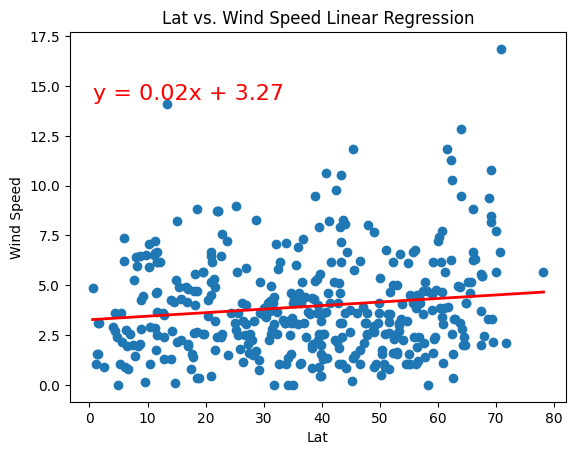

In [153]:
# Northern Hemisphere
create_regression_plot(northern_hemisphere_df, 'Lat', 'Wind Speed', 'top left')

**Discussion about the linear relationship:** 

- The positive coefficient of the latitude (0.02) suggests a weak positive relationship between latitude and wind speed in the northern hemisphere.<br><br>
- As latitude increases (moving away from the equator towards the poles), there is a slight tendency for wind speed to increase, although the effect is relatively small.<br><br>
- The y-intercept (3.27) represents the estimated wind speed when latitude is zero. In this case, it suggests that at the equator (latitude zero), the wind speed is around 3.27 (m/s) 

The r-value is: -0.27941276817385896
The equation is: y = -0.05x + 2.50


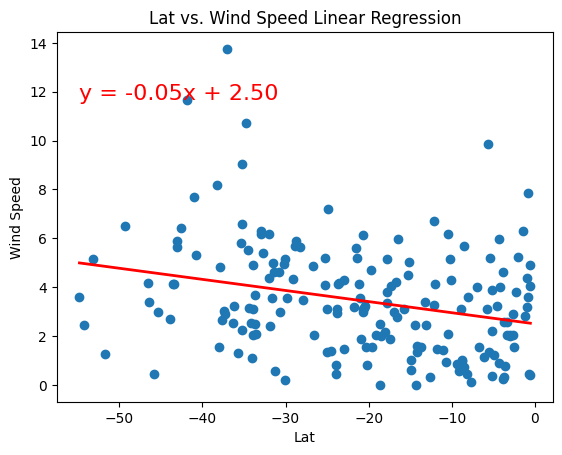

In [154]:
# Southern Hemisphere
create_regression_plot(southern_hemisphere_df, 'Lat', 'Wind Speed', 'top left')

**Discussion about the linear relationship:** 

- The negative coefficient of the latitude (-0.05) suggests a weak negative relationship between latitude and wind speed in the southern hemisphere.<br><br>
- As latitude increases (moving away from the equator towards the poles), there is a slight tendency for wind speed to decrease, although the effect is relatively small.<br><br>
- The y-intercept (2.50) represents the estimated wind speed when latitude is zero. In this case, it suggests that at the equator (latitude zero), the wind speed is around 2.50  (m/s).